In [278]:
import pandas as pd
import  numpy as np
from numpy import genfromtxt
from IPython.core.display import display, HTML

In [284]:
display(HTML(r"<h1>The data for this excercise was collected from <a href='http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=excel'>Worldbank</a></h1>"))

In [294]:
display(HTML(r"<pre>This implementation is a vanilla Linear regression, although the result can be improved by using more data like <strong>birth/death</strong> rate and making the model multi-variable-regression. Related files can be found in root directory of this repository</pre>"))

In [191]:
def load_and_build_features():
    np_data = genfromtxt('Population.csv', delimiter=',',dtype = 'float') #Load csv
    # add new colum 
    np_data = np.append(np_data,np.zeros(np_data.shape[0]).reshape(np_data.shape[0],1), 1)
    # copy population into new colum
    np_data[:,2] = np_data[:,1]
    # create array for shifted population by one step
    shifted_pop = np.concatenate([np.zeros(1).reshape(1,1),np_data[:,2].reshape(np_data.shape[0],1)])[0:-1]
    # Assign shifted array to new column
    np_data[:,2] = shifted_pop.reshape(len(shifted_pop))
    # Add new column
    np_data = np.append(np_data,np.zeros(np_data.shape[0]).reshape(np_data.shape[0],1), 1)
    # Compute and add differ of population from last year using shifted population
    np_data[:,3] = np_data[:,1] - np_data[:,2]
    # Add new column
    np_data = np.append(np_data,np.zeros(np_data.shape[0]).reshape(np_data.shape[0],1), 1)
    # Compute and add percenetage increase in population into new column
    np_data[:,4] = ((np_data[:,1] - np_data[:,2])/np_data[:,1])*100
    # Add new column
    np_data = np.append(np_data,np.zeros(np_data.shape[0]).reshape(np_data.shape[0],1), 1)
    # Create sequence from years
    np_data[:,5] = np_data[:,0]-1960
    # Add new column
    np_data = np.append(np_data,np.zeros(np_data.shape[0]).reshape(np_data.shape[0],1), 1)
    # Compute and add log of population to new column
    np_data[:,6] = np.log(np_data[:,1])
    # Add new column
    np_data = np.append(np_data,np.zeros(np_data.shape[0]).reshape(np_data.shape[0],1), 1)
    # compute and add log of percentage increase into new column
    np_data[:,7] = np.log(np_data[:,4])
    return np_data

In [192]:
np_data = load_and_build_features()
df = pd.DataFrame(data = np_data[1:np_data.shape[0]],columns = ['year','population','shifted_population','increase_from_last_year','per_increase_from_last_year','seq_year','population_log','per_increase_from_last_year_log'])

In [141]:
df.head()

,year,population,shifted_population,increase_from_last_year,per_increase_from_last_year,seq_year,population_log
0,1961.0,458691457.0,449661874.0,9029583.0,1.968553,1.0,19.943888
1,1962.0,468054145.0,458691457.0,9362688.0,2.000343,2.0,19.964095
2,1963.0,477729958.0,468054145.0,9675813.0,2.025373,3.0,19.984556
3,1964.0,487690114.0,477729958.0,9960156.0,2.042312,4.0,20.005191
4,1965.0,497920270.0,487690114.0,10230156.0,2.054577,5.0,20.025951


In [277]:
display(HTML('<h1>Ploting various graphs to figureout best features for linear regression</h1>'))

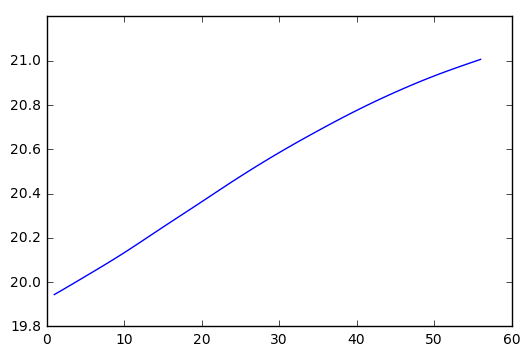

In [164]:
plt.plot(df.seq_year, df.population_log, "-")
plt.show()

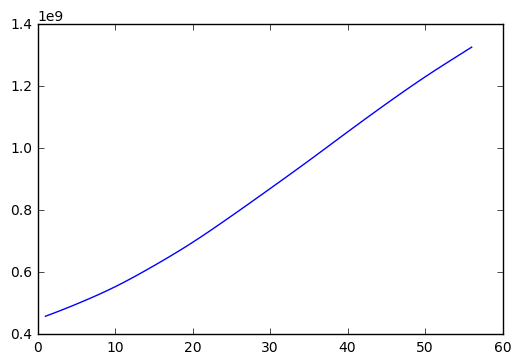

In [165]:
#['year','population','shifted_population','increase_from_last_year','per_increase_from_last_year','
#                                                                                            seq_year','population_log']
plt.plot(df.seq_year, df.population, "-")
plt.show()

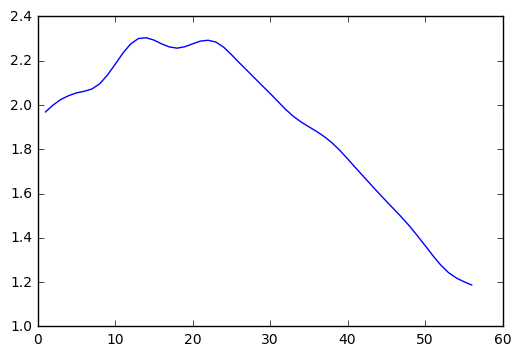

In [166]:
#['year','population','shifted_population','increase_from_last_year','per_increase_from_last_year','
#                                           seq_year','population_log','per_increase_from_last_year_log']
plt.plot(df.seq_year, df.per_increase_from_last_year, "-")
plt.show()

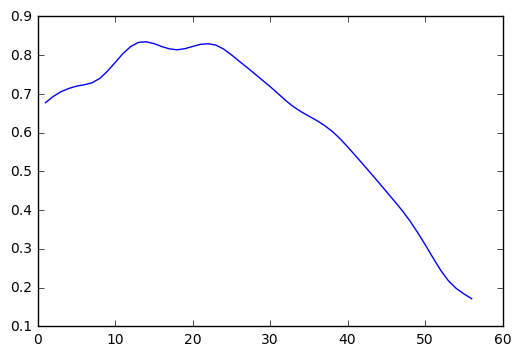

In [167]:
#['year','population','shifted_population','increase_from_last_year','per_increase_from_last_year','
#                                           seq_year','population_log','per_increase_from_last_year_log']
plt.plot(df.seq_year, df.per_increase_from_last_year_log, "-")
plt.show()

In [139]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
import numpy as np

In [193]:
df_all = pd.DataFrame(data = np_data,columns = ['year','population','shifted_population','increase_from_last_year','per_increase_from_last_year','seq_year','population_log','per_increase_from_last_year_log'])

In [240]:
#X = df[['seq_year','per_increase_from_last_year','increase_from_last_year']]
X = df_all[['seq_year']]+1
#X = df_all[['year']]
y = df_all.population
#X = X.join(pd.DataFrame(np.ones(X.shape[0]),columns = ['bias']))
reg = linear_model.LinearRegression()
reg.fit(X, y);

In [241]:
print('reg.coef_ : '+str(reg.coef_))

reg.coef_ : [ 16436232.85772621]


In [242]:
pred = reg.predict(X)
x_rmse = mean_squared_error(pred, y)
x_rmse

383243968746315.37

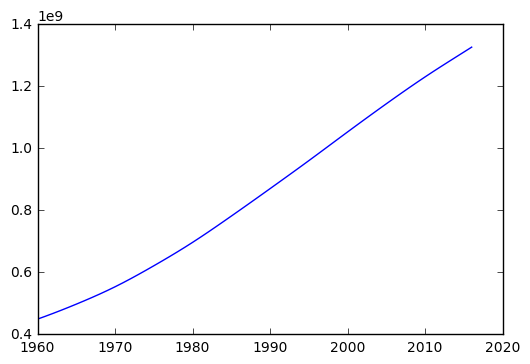

In [276]:
display(HTML('<h1>Population graph</h1>'))
plt.plot(df_all.year, df_all.population, "-")
plt.show();

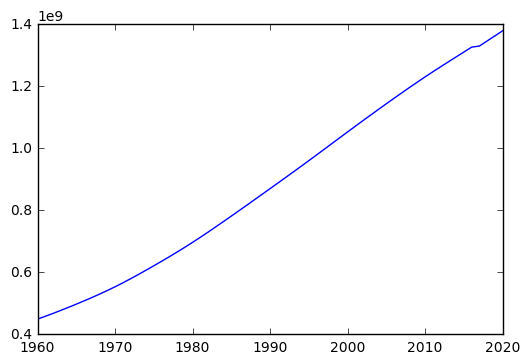

In [272]:
# plt.plot(df_all.year, df_all.population, "-")
future_years = pd.DataFrame(np.array([2017,2018,2019,2020]))
future_df = pd.DataFrame(np.array([58,59,60,61]))
prediction = reg.predict(future_df)
future_years = pd.concat([df_all.year,future_years])
prediction = pd.concat([df_all.population,pd.DataFrame(prediction)])
display(HTML('<h1>Population graph including prediction</h1>'))
plt.plot(future_years, prediction, "-")
plt.show();

In [271]:
display(HTML("<a href='https://populationpyramid.net/india/2020/' style='font-size: 25px'>Population Pyramid</a>"))

In [282]:
res = r"Estimated India's population by 2020 will be "+ str(int(prediction.iloc[60]))+" ( "+str(int(prediction.iloc[60])/1000000)+" Million )"
display(HTML("<h1 style='color:blue;'>"+res+"</h1>"))